In [1]:
from sklearn.datasets import make_classification
import numpy as np

X, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,
                           hypercube=False, class_sep=20)

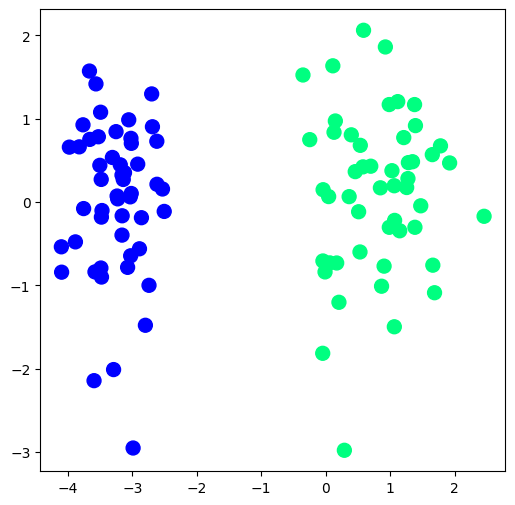

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100)
plt.show()

In [5]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(penalty=None, solver='sag')
lr_clf.fit(X, y)

/home/silly_ronny/miniconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty=None, solver='sag')

In [6]:
print(lr_clf.coef_)
lr_clf.intercept_

[[4.81456583 0.21148208]]


array([5.79246353])

In [7]:
m1 = -(lr_clf.coef_[0][0]/lr_clf.coef_[0][1])
b1 = -(lr_clf.intercept_/lr_clf.coef_[0][1])

In [8]:
x_input = np.linspace(-3, 3, 100)
y_input = m1*x_input + b1

In [21]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [19]:
sigmoid(1)

np.float64(0.7310585786300049)

# Binary Cross Entropy

## Loss

y*log(yhat) - (1-y)*log(1-yhat)

## d_Loss/d_Weights
-1/m * (y - yhat)*X

## Gradient Descent
w = w - lr * d_loss/d_weights

w = w + lr * 1/m *(y - yhat) * X

In [38]:
def lr_scratch(x, y):
    X = np.insert(x, 0, 1, axis=1)
    
    # three weights for all 100 examples
    weights = np.ones(X.shape[1])
    
    lr=0.5
    
    #batch gradient descent
    for i in range(2500):
        y_hat = sigmoid(np.dot(X, weights))
        weights += lr * (np.dot((y-y_hat), X)/X.shape[0])
    
    return weights[1:], weights[0]

In [39]:
coef, intercept = lr_scratch(X, y)
coef, intercept

(array([4.36410145, 0.17189254]), np.float64(5.148029492159727))

In [40]:
m2 = -coef[0]/coef[1]
b2 = -intercept/coef[1]

In [41]:
y_input2 = m2*x_input + b2

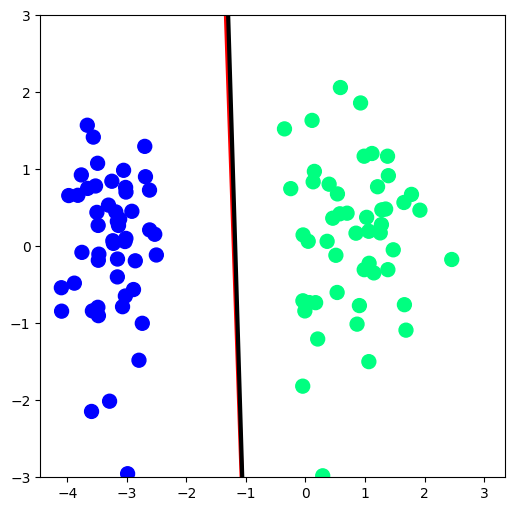

In [42]:
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100)
plt.plot(x_input, y_input, color='red', linewidth=3)
plt.plot(x_input, y_input2, color='black', linewidth=3)
plt.ylim(-3, 3)
plt.show()